# **Comparison of Covid19 trend in Italy and Sweden**

We first examine the 80-day trend of active cases in Italy [1] and Sweden [2] since the day they reached 1000 (February 29 for Italy, March 15 for Sweden). 

Italy was in lockdown since March 9 and has lifted the majority of the lockdown measures on May 18. Sweden has not enforced a lockdown as of June 3.

The active cases are calculated as: total cases - deaths - recoveries.

The graphs also show hospitalized cases, intensive care unit cases and deaths for the same time period (February 29 - May 18 for Italy, March 15 - June 2 for Sweden).

Below is an outline of the countries' population figures:

Country | Population | Density | Urban population | Median age | Pop. over 65 y.o.
:---: | :---: | :---: | :---: | :---: | :---:
Italy | 60,471,198 | 206/km^2 | 69.5% | 47.3 | 23%
Sweden | 10,092,371 | 23/km^2 | 87.4% | 41.2 | 19.9%

[1] [Il Sole 24 Ore - Coronavirus in Italia](https://lab24.ilsole24ore.com/coronavirus/)

[2] [C19.SE - Coronavirus i Sverige](https://c19.se/)




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


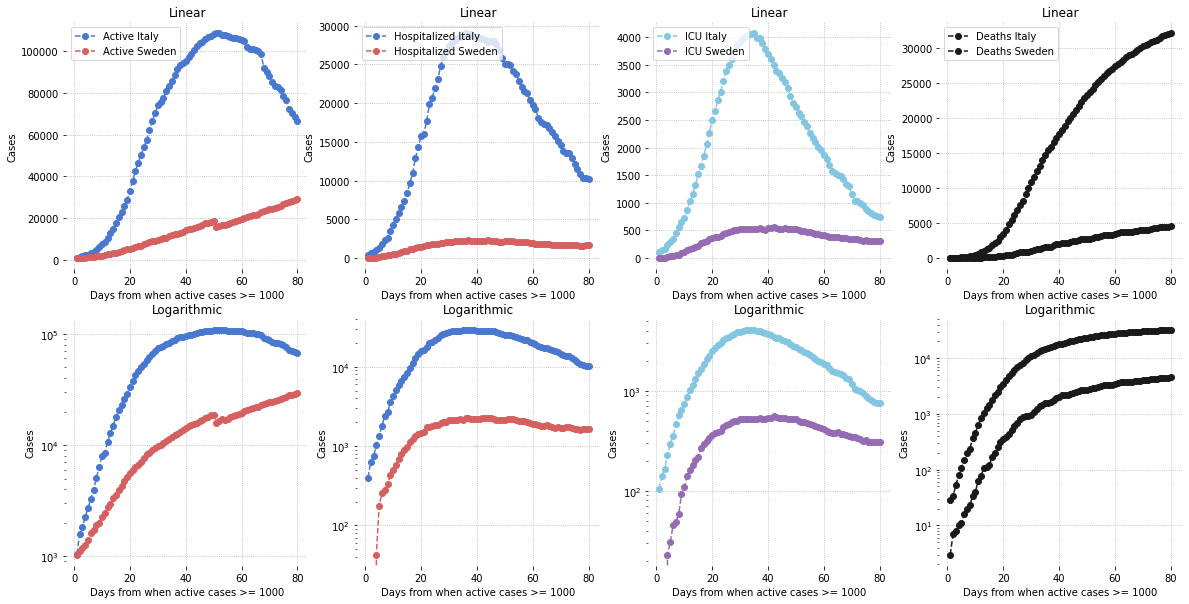

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

italy_active = [1049, 1577, 1835, 2263, 2706, 3296, 3916, 5061, 6387, 7985, 8514, 10590, 12839, 14955, 17750, 20603, 23073, 26062, 28710, 33190, 
                37860, 42681, 46638, 50418, 54030, 57521, 62013, 66414, 70065, 73880, 75528, 77635, 80572, 83049, 85388, 88274, 91246, 93187,
                94067, 95262, 96877, 98273, 100269, 102253, 103616, 104291, 105418, 106607, 106962, 107771, 108257, 108237, 107709, 107699, 106848,
                106527, 105847, 106103, 105813, 105205, 104657, 101551, 100943, 100704, 100179, 99980, 98467, 91528, 89624, 87961, 84842, 83324,
                82488, 81266, 78457, 76440, 72070, 70187, 68351, 66553] 

sweden_active = [1036, 1113, 1187, 1276, 1412, 1607, 1734, 1897, 2003, 2243, 2448, 2747, 2948, 3326, 3574, 3928, 4291, 4735, 5157, 5566, 5961, 6350, 
                 6634, 7026, 7653, 8233, 8498, 9016, 9352, 9717, 10087, 10427, 10794, 11337, 11871, 12382, 12691, 13039, 13603, 14247, 14969, 
                 15027, 15548, 15740, 16349, 16904, 17591, 17963, 18483, 18713, 15918, 16383, 16985, 16686, 17234, 17819, 18175, 18544, 19054,
                 19561, 20172, 20712, 21095, 21533, 21784, 22171, 22853, 23390, 24026, 24296, 24534, 24988, 25487, 26081, 26644, 27260, 27915, 28350,
                 28668, 29302]

italy_hospitalized = [401, 639, 742, 1034, 1346, 1790, 2394, 2651, 3550, 4316, 5038, 5838, 6650, 7426, 8372, 9663, 11025, 12894, 14363, 
                      15757, 16020, 17708, 19846, 20692, 21937, 23112, 24753, 26029, 26676, 27386, 27795, 28192, 28403, 28540, 28741, 
                      29010, 28949, 28976, 28718, 28485, 28399, 28242, 28144, 27847, 28023, 28011, 27643, 26893, 25786, 25007, 25033, 
                      24906, 24134, 23805, 22871, 22068, 21533, 21372, 20353, 19723, 19210, 18149, 17569, 17357, 17242, 16823, 16270,
                      15769, 15174, 14636, 13834, 13618, 13539, 12865, 12172, 11453, 10792, 10400, 10311, 10207]
                      

sweden_hospitalized = [0, 0, 0, 43, 177, 256, 279, 331, 426, 497, 577, 696, 803, 902, 973, 1121, 1219, 1320, 1400, 1480, 1508, 1726, 1742, 
                       1799, 1838, 1846, 1942, 1986, 2037, 2100, 2138, 2152, 2156, 2221, 2156, 2234, 2274, 2202, 2218, 2207, 2205, 2233, 2242,
                       2288, 2238, 2193, 2139, 2118, 2125, 2150, 2199, 2222, 2172, 2128, 2089, 2047, 2040, 2028, 1950, 1919, 1873, 1817, 1797,
                       1792, 1829, 1772, 1747, 1705, 1732, 1712, 1707, 1734, 1730, 1687, 1633, 1629, 1608, 1617, 1649, 1630]


italy_icu = [105, 140, 166, 229, 295, 351, 462, 567, 650, 733, 877, 1028, 1153, 1328, 1518, 1672, 1851, 2060, 2257, 2498, 2655, 2857, 3009, 3204, 3396, 3489, 
             3612, 3732, 3856, 3906, 3981, 4023, 4035, 4053, 4068, 3994, 3977, 3898, 3792, 3693, 3605, 3497, 3381, 3343, 3260, 3186, 3079, 2936, 2812, 2733, 
             2635, 2573, 2471, 2384, 2267, 2173, 2102, 2009, 1956, 1863, 1795, 1694, 1578, 1539, 1501, 1479, 1427, 1333, 1311, 1168, 1034, 1027, 999, 952, 893,
             855, 808, 775, 762, 749] 

sweden_icu = [0, 0, 0, 23, 31, 45, 49, 58, 92, 110, 142, 160, 182, 202, 219, 265, 293, 312, 339, 361, 376, 387, 400, 439, 451, 464, 486, 504, 500, 
              521, 522, 528, 527, 523, 524, 522, 537, 525, 517, 537, 541, 556, 543, 533, 531, 537, 524, 519, 526, 523, 504, 492, 484, 474, 466, 459,
              443, 434, 422, 411, 401, 388, 381, 379, 383, 366, 366, 358, 352, 344, 347, 337, 331, 316, 320, 310, 305, 309, 307, 309]


italy_d = [29, 34, 52, 79, 107, 148, 197, 233, 366, 463, 631, 827, 1016, 1266, 1441, 1809, 2158, 2503, 2978, 3405, 4032, 4825, 5475, 6077, 6820, 7503, 8165, 
           9134, 10023, 10779, 11591, 12428, 13155, 13915, 14681, 15362, 15887, 16523, 17127, 17669, 18279, 18849, 19468, 19899, 20465, 21067, 21645, 22170, 
           22745, 23227, 23660, 24114, 24648, 25085, 25549, 25969, 26384, 26644, 26977, 27359, 27682, 27967, 28236, 28710, 28884, 29079, 29315, 29684,
           29958, 30201, 30395, 30560, 30739, 30911, 31106, 31368, 31610, 31763, 31908, 32007]

sweden_d = [3, 7, 8, 10, 11, 16, 20, 23, 33, 40, 63, 78, 105, 112, 123, 167, 199, 259, 307, 358, 391, 428, 506, 618, 696, 812, 881, 901, 915, 946, 1084, 
            1223, 1360, 1442, 1546, 1578, 1633, 1795, 1939, 2028, 2159, 2202, 2206, 2289, 2380, 2473, 2604, 2667, 2686, 2698, 2787, 2877, 2959, 3056, 3191,
            3229, 3239, 3279, 3343, 3476, 3550, 3669, 3689, 3694, 3712, 3783, 3857, 3895, 3956, 4029, 4032, 4066, 4146, 4243, 4291, 4361, 4408, 4415, 4433,
            4501]

x = np.arange(1, len(italy_active) + 1)

fig = plt.figure()
ax1 = fig.add_subplot(241)
ax1.plot(x, italy_active, '--bo', label='Active Italy')
ax1.plot(x, sweden_active, '--ro', label='Active Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.set_xlabel('Days from when active cases >= 1000')
ax1.set_ylabel('Cases')
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(245)
ax2.plot(x, italy_active, '--bo')
ax2.plot(x, sweden_active, '--ro')
ax2.set_title('Logarithmic')
ax2.set_xlabel('Days from when active cases >= 1000')
ax2.set_ylabel('Cases')
ax2.set_yscale('log')
ax2.axes.grid(linestyle='dotted')

ax3 = fig.add_subplot(242)
ax3.plot(x, italy_hospitalized, '--bo', label='Hospitalized Italy')
ax3.plot(x, sweden_hospitalized, '--ro', label='Hospitalized Sweden')
ax3.legend(loc="upper left")
ax3.set_title('Linear')
ax3.set_xlabel('Days from when active cases >= 1000')
ax3.set_ylabel('Cases')
ax3.axes.grid(linestyle='dotted')

ax4 = fig.add_subplot(246)
ax4.plot(x, italy_hospitalized, '--bo')
ax4.plot(x, sweden_hospitalized, '--ro')
ax4.set_title('Logarithmic')
ax4.set_xlabel('Days from when active cases >= 1000')
ax4.set_ylabel('Cases')
ax4.set_yscale('log')
ax4.axes.grid(linestyle='dotted')

ax5 = fig.add_subplot(243)
ax5.plot(x, italy_icu, '--co', label='ICU Italy')
ax5.plot(x, sweden_icu, '--mo', label='ICU Sweden')
ax5.legend(loc="upper left")
ax5.set_title('Linear')
ax5.set_xlabel('Days from when active cases >= 1000')
ax5.set_ylabel('Cases')
ax5.axes.grid(linestyle='dotted')

ax6 = fig.add_subplot(247)
ax6.plot(x, italy_icu, '--co')
ax6.plot(x, sweden_icu, '--mo')
ax6.set_title('Logarithmic')
ax6.set_xlabel('Days from when active cases >= 1000')
ax6.set_ylabel('Cases')
ax6.set_yscale('log')
ax6.axes.grid(linestyle='dotted')

ax7 = fig.add_subplot(244)
ax7.plot(x, italy_d, '--ko', label='Deaths Italy')
ax7.plot(x, sweden_d, '--ko', label='Deaths Sweden')
ax7.legend(loc="upper left")
ax7.set_title('Linear')
ax7.set_xlabel('Days from when active cases >= 1000')
ax7.set_ylabel('Cases')
ax7.axes.grid(linestyle='dotted')

ax8 = fig.add_subplot(248)
ax8.plot(x, italy_d, '--ko')
ax8.plot(x, sweden_d, '--ko')
ax8.set_title('Logarithmic')
ax8.set_xlabel('Days from when active cases >= 1000')
ax8.set_ylabel('Cases')
ax8.set_yscale('log')
ax8.axes.grid(linestyle='dotted')


sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
fig.set_figheight(10)
fig.set_figwidth(20)
plt.show()

The active cases and deaths for the countries are also plotted singularly for better trend visualization.

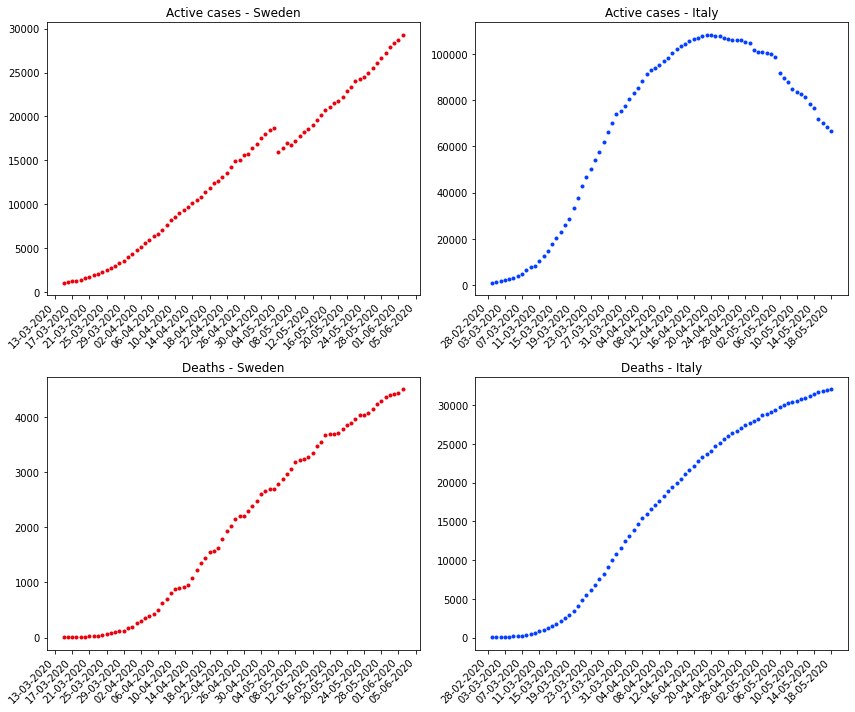

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

interval = 4
start = dt.date(2020, 3, 15)
end = start + dt.timedelta(days=len(sweden_active))
days = mdates.drange(start, end, dt.timedelta(days=1))

start = dt.date(2020, 2, 29)
end = start + dt.timedelta(days=len(italy_active))
days_it = mdates.drange(start, end, dt.timedelta(days=1))

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(days, sweden_active, 'or', markersize=3)
ax1.set_title('Active cases - Sweden')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax2 = fig.add_subplot(222)
ax2.plot(days_it, italy_active, 'ob', markersize=3)
ax2.set_title('Active cases - Italy')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax3 = fig.add_subplot(223)
ax3.plot(days, sweden_d, 'or', markersize=3)
ax3.set_title('Deaths - Sweden')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax4 = fig.add_subplot(224)
ax4.plot(days_it, italy_d, 'ob', markersize=3)
ax4.set_title('Deaths - Italy')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

sns.set_color_codes('bright')
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
fig.set_figheight(10)
fig.set_figwidth(12)
plt.tight_layout()
plt.show()

We then compare total cases, active cases and deaths for the two countries from March 2 (the first day reported for Sweden) until today:

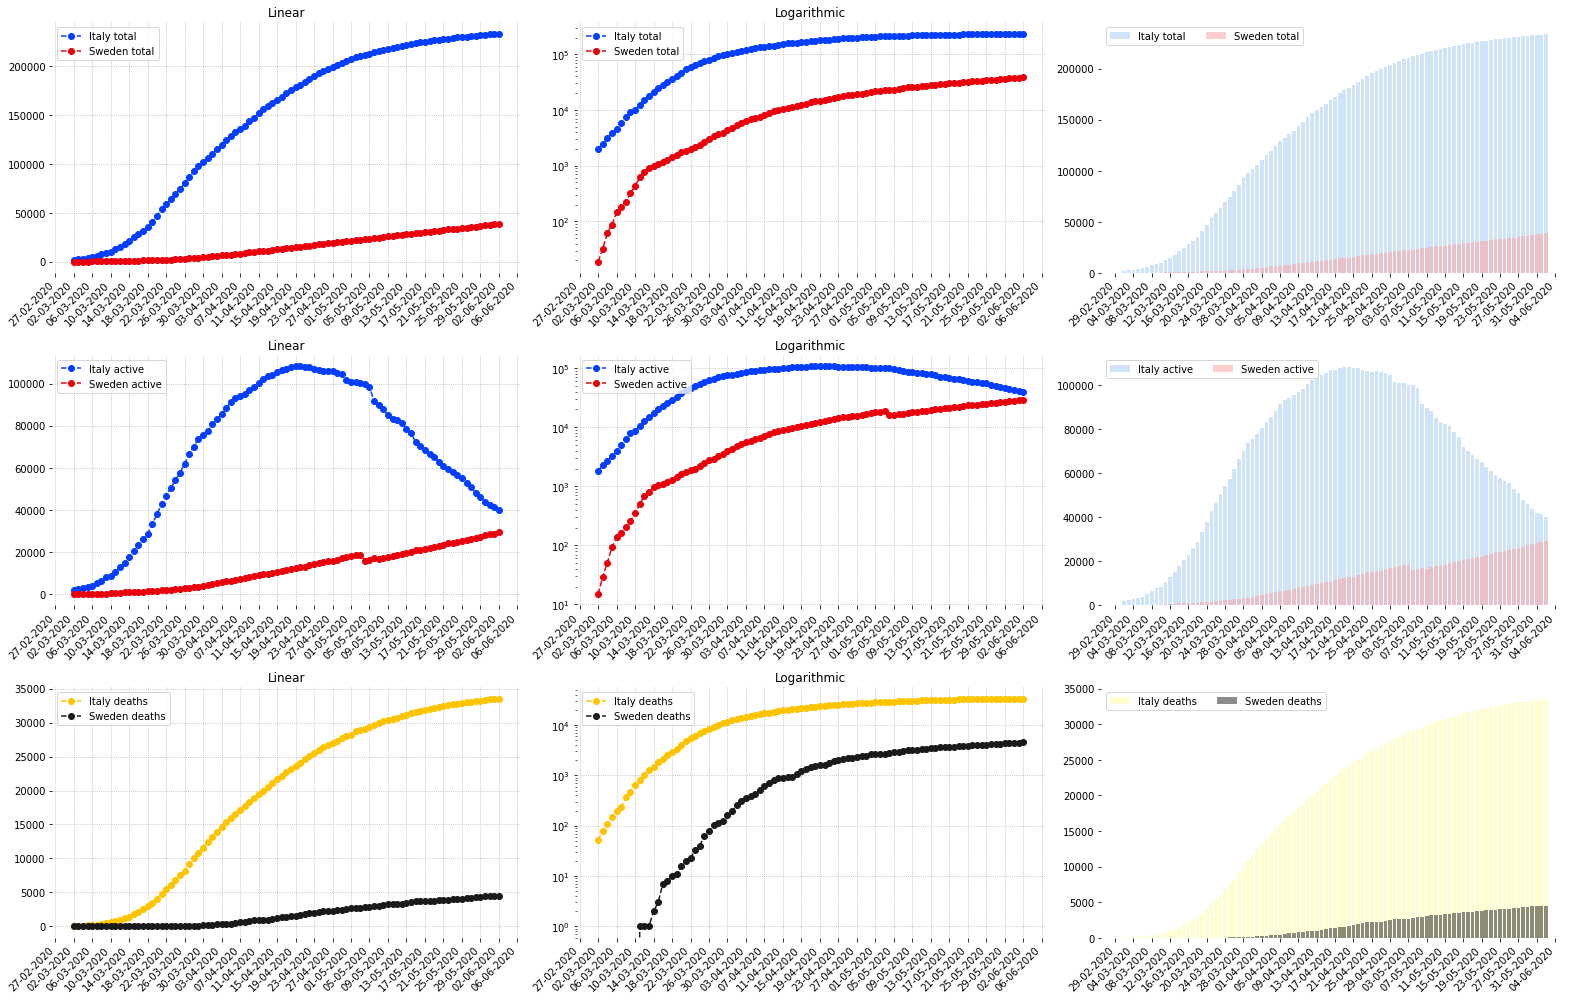

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

italy_total = [2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 15113, 17660, 21157, 24747, 27980, 31506, 35713, 41035, 47021, 53578, 59137,
               63927, 69176, 74386, 80539, 86498, 92472, 97689, 101739, 105792, 110574, 115242, 119827, 124632, 128948, 132547, 135586, 139422, 143626, 147577,
               152271, 156363, 159516, 162488, 165155, 168941, 172434, 175925, 178972, 181228, 183957, 187327, 189973, 192994, 195351, 197675, 199414, 201505,
               203591, 205463, 207428, 209328, 210717, 211938, 213013, 214457, 215858, 217185, 218268, 219070, 219814, 221216, 222104, 223096, 223885, 224760,
               225435, 225886, 226699, 227364, 228006, 228658, 229327, 229858, 230158, 230555, 231139, 231732, 232248, 232664, 233019, 233197, 233515] 

sweden_total = [19, 32, 62, 87, 146, 179, 225, 326, 424, 620, 772, 924, 995, 1064, 1147, 1266, 1411, 1554, 1734, 1868, 1985, 2167, 2397, 2711, 2997, 
                3363, 3663, 3944, 4359, 4834, 5319, 5874, 6477, 6834, 7175, 7565, 8303, 8958, 9602, 10057, 10451, 10914, 11351, 11831, 12435, 13058, 
                13746, 14277, 14666, 15126, 15778, 16475, 17181, 17956, 18468, 18859, 19353, 19743, 20382, 21200, 21635, 22174, 22416, 22789, 23334, 24019, 
                24713, 25396, 26019, 26385, 26794, 27368, 28008, 28693, 29352, 29755, 30198, 30467, 30925, 31681, 32256, 32953, 33296, 33537, 34025, 34604,
                35295, 35906, 36592, 37294, 37736, 38072, 38774]

italy_active = [1835, 2263, 2706, 3296, 3916, 5061, 6387, 7985, 8514, 10590, 12839, 14955, 17750, 20603, 23073, 26062, 28710, 33190, 37860, 42681, 46638, 
                50418, 54030, 57521, 62013, 66414, 70065, 73880, 75528, 77635, 80572, 83049, 85388, 88274, 91246, 93187, 94067, 95262, 96877, 98273, 100269, 
                102253, 103616, 104291, 105418, 106607, 106962, 107771, 108257, 108237, 107709, 107699, 106848, 106527, 105847, 106103, 105813, 105205, 
                104657, 101551, 100943, 100704, 100179, 99980, 98467, 91528, 89624, 87961, 84842, 83324, 82488, 81266, 78457, 76440, 72070, 70187, 68351, 
                66553, 65129, 62752, 60960, 59322, 57752, 56594, 55300, 52942, 50966, 47986, 46175, 43691, 42075, 41367, 39893] 

sweden_active = [15, 29, 51, 93, 136, 160, 202, 259, 354, 498, 685, 812, 958, 1036, 1113, 1187, 1276, 1412, 1607, 1734, 1897, 2003, 2243, 2448, 2747, 
                 2948, 3326, 3574, 3928, 4291, 4735, 5157, 5566, 5961, 6350, 6634, 7026, 7653, 8233, 8498, 9016, 9352, 9717, 10087, 10427, 10794, 11337, 
                 11871, 12382, 12691, 13039, 13603, 14247, 14969, 15027, 15548, 15740, 16349, 16904, 17591, 17963, 18483, 18713, 15918, 16383, 16985, 16686,
                 17234, 17819, 18175, 18544, 19054, 19561, 20172, 20712, 21095, 21533, 21784, 22171, 22853, 23390, 24026, 24296, 24534, 24988, 25487, 26081,
                 26644, 27260, 27915, 28350, 28668, 29302]


italy_d = [52, 79, 107, 148, 197, 233, 366, 463, 631, 827, 1016, 1266, 1441, 1809, 2158, 2503, 2978, 3405, 4032, 4825, 5475, 6077, 6820, 7503, 8165, 9134, 
           10023, 10779, 11591, 12428, 13155, 13915, 14681, 15362, 15887, 16523, 17127, 17669, 18279, 18849, 19468, 19899, 20465, 21067, 21645, 22170, 
           22745, 23227, 23660, 24114, 24648, 25085, 25549, 25969, 26384, 26644, 26977, 27359, 27682, 27967, 28236, 28710, 28884, 29079, 29315, 29684,
           29958, 30201, 30395, 30560, 30739, 30911, 31106, 31368, 31610, 31763, 31908, 32007, 32169, 32330, 32486, 32616, 32735, 32785, 32877, 32955, 33072,
           33142, 33229, 33340, 33415, 33475, 33530]

sweden_d = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 7, 8, 10, 11, 16, 20, 23, 33, 40, 63, 78, 105, 112, 123, 167, 199, 259, 307, 358, 391, 428, 506, 
            618, 696, 812, 881, 901, 915, 946, 1084, 1223, 1360, 1442, 1546, 1578, 1633, 1795, 1939, 2028, 2159, 2202, 2206, 2289, 2380, 2473, 2604, 2667,
            2686, 2698, 2787, 2877, 2959, 3056, 3191, 3229, 3239, 3279, 3343, 3476, 3550, 3669, 3689, 3694, 3712, 3783, 3857, 3895, 3956, 4029, 4032, 4066, 
            4146, 4243, 4291, 4361, 4408, 4415, 4433, 4501]

start = dt.date(2020, 3, 2)
end = start + dt.timedelta(days=len(italy_active))
days = mdates.drange(start, end, dt.timedelta(days=1))


fig = plt.figure()
ax1 = fig.add_subplot(331)
ax1.plot(days, italy_total, '--bo', label='Italy total')
ax1.plot(days, sweden_total, '--ro', label='Sweden total')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(332)
ax2.plot(days, italy_total, '--bo', label='Italy total')
ax2.plot(days, sweden_total, '--ro', label='Sweden total')
ax2.legend(loc="upper left")
ax2.set_title('Logarithmic')
ax2.set_yscale('log')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax2.axes.grid(linestyle='dotted')

ax3 = fig.add_subplot(333)
sns.set_color_codes('pastel')
ax3.bar(days, italy_total, color='b', alpha=0.5, label='Italy total')
ax3.bar(days, sweden_total, color='r', alpha=0.5, label='Sweden total')
ax3.legend(ncol = 2, loc = 'upper left')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax4 = fig.add_subplot(334)
ax4.plot(days, italy_active, '--bo', label='Italy active')
ax4.plot(days, sweden_active, '--ro', label='Sweden active')
ax4.legend(loc="upper left")
ax4.set_title('Linear')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax4.axes.grid(linestyle='dotted')

ax5 = fig.add_subplot(335)
ax5.plot(days, italy_active, '--bo', label='Italy active')
ax5.plot(days, sweden_active, '--ro', label='Sweden active')
ax5.legend(loc="upper left")
ax5.set_title('Logarithmic')
ax5.set_yscale('log')
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax5.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax5.axes.grid(linestyle='dotted')

ax6 = fig.add_subplot(336)
sns.set_color_codes('pastel')
ax6.bar(days, italy_active, color='b', alpha=0.5, label='Italy active')
ax6.bar(days, sweden_active, color='r', alpha=0.5, label='Sweden active')
ax6.legend(ncol = 2, loc = 'upper left')
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax6.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax7 = fig.add_subplot(337)
ax7.plot(days, italy_d, '--yo', label='Italy deaths')
ax7.plot(days, sweden_d, '--ko', label='Sweden deaths')
ax7.legend(loc="upper left")
ax7.set_title('Linear')
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax7.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax7.axes.grid(linestyle='dotted')

ax8 = fig.add_subplot(338)
ax8.plot(days, italy_d, '--yo', label='Italy deaths')
ax8.plot(days, sweden_d, '--ko', label='Sweden deaths')
ax8.legend(loc="upper left")
ax8.set_title('Logarithmic')
ax8.set_yscale('log')
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax8.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax8.axes.grid(linestyle='dotted')

ax9 = fig.add_subplot(339)
sns.set_color_codes('pastel')
ax9.bar(days, italy_d, color='y', alpha=0.5, label='Italy deaths')
ax9.bar(days, sweden_d, color='k', alpha=0.5, label='Sweden deaths')
ax9.legend(ncol = 2, loc = 'upper left')
ax9.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax9.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

sns.set_color_codes('bright')
sns.despine(left = True, bottom = True)
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
fig.set_figheight(14)
fig.set_figwidth(22)
plt.tight_layout()
plt.show()

We then make a comparison of total, active cases and deaths within the same country for the same time period:

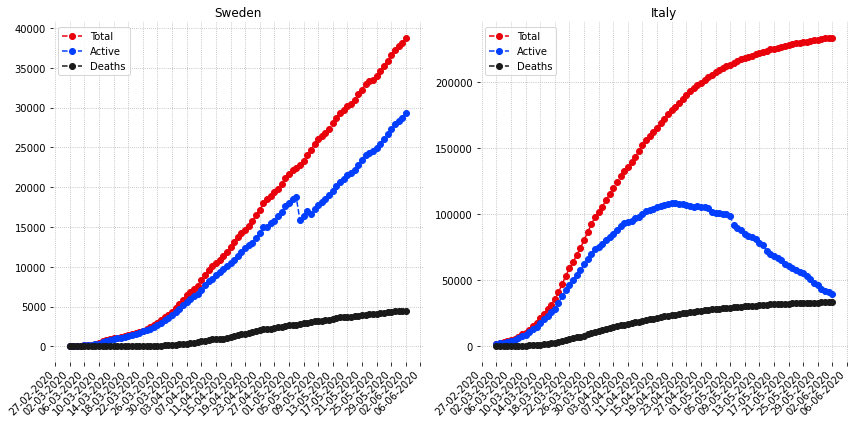

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

start = dt.date(2020, 3, 2)
end = start + dt.timedelta(days=len(italy_active))
days = mdates.drange(start, end, dt.timedelta(days=1))


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(days, sweden_total, '--ro', label='Total')
ax1.plot(days, sweden_active, '--bo', label='Active')
ax1.plot(days, sweden_d, '--ko', label='Deaths')
ax1.legend(loc="upper left")
ax1.set_title('Sweden')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(122)
ax2.plot(days, italy_total, '--ro', label='Total')
ax2.plot(days, italy_active, '--bo', label='Active')
ax2.plot(days, italy_d, '--ko', label='Deaths')
ax2.legend(loc="upper left")
ax2.set_title('Italy')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax2.axes.grid(linestyle='dotted')

sns.set_color_codes('bright')
sns.despine(left = True, bottom = True)
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
fig.set_figheight(6)
fig.set_figwidth(12)
plt.tight_layout()
plt.show()

We then plot the daily increase for total and active cases and deaths during the same time period, as line chart and bar chart:

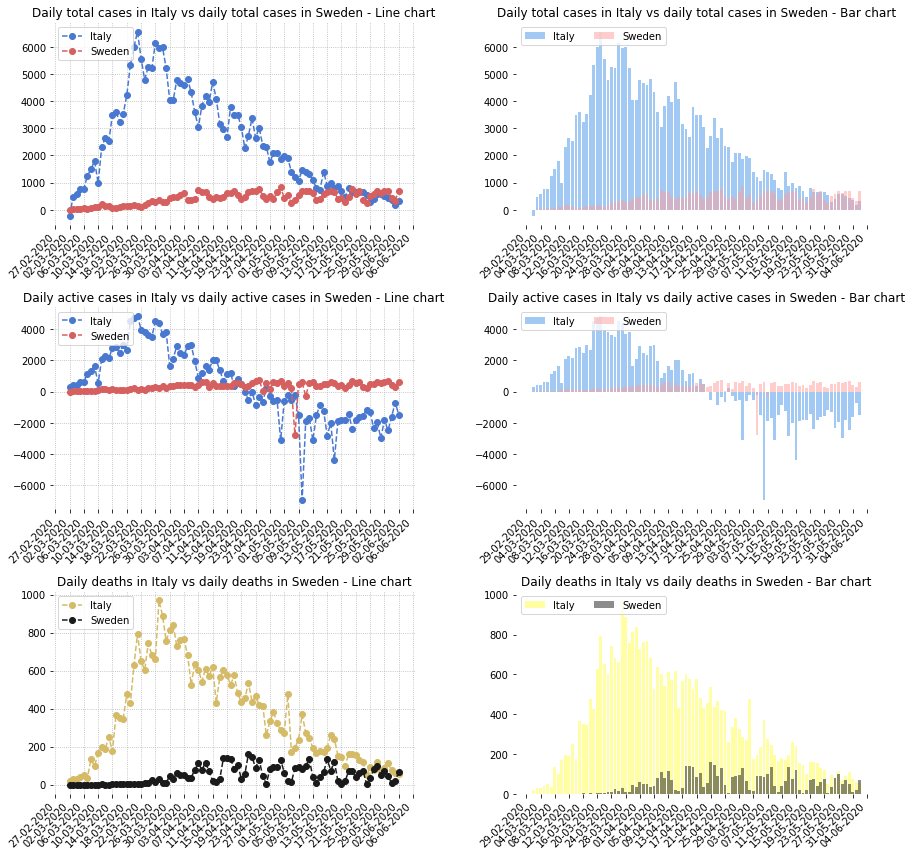

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

it_tot_day = [-224]
for i in range(1, len(italy_total)):
  it_tot_day.append(italy_total[i] - italy_total[i - 1])

swe_tot_day = [5]
for i in range(1, len(sweden_total)):
  swe_tot_day.append(sweden_total[i] - sweden_total[i - 1])

it_act_day = [258]
for i in range(1, len(italy_active)):
  it_act_day.append(italy_active[i] - italy_active[i - 1])

swe_active_day = [1]
for i in range(1, len(sweden_active)):
  swe_active_day.append(sweden_active[i] - sweden_active[i - 1])

it_d_day = [18]
for i in range(1, len(italy_d)):
  it_d_day.append(italy_d[i] - italy_d[i - 1])

swe_d_day = [0]
for i in range(1, len(sweden_d)):
  swe_d_day.append(sweden_d[i] - sweden_d[i - 1])

start = dt.date(2020, 3, 2)
end = start + dt.timedelta(days=len(italy_active))
days = mdates.drange(start, end, dt.timedelta(days=1))


fig = plt.figure()
ax1 = fig.add_subplot(321)
ax1.plot(days, it_tot_day, '--bo', label='Italy')
ax1.plot(days, swe_tot_day, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Daily total cases in Italy vs daily total cases in Sweden - Line chart')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

sns.set_color_codes('pastel')
ax2 = fig.add_subplot(322)

ax2.bar(days, it_tot_day, color='b', label='Italy')
ax2.bar(days, swe_tot_day, color='r', alpha=0.5, label='Sweden')
ax2.legend(ncol = 2, loc = 'upper left')
ax2.set_title('Daily total cases in Italy vs daily total cases in Sweden - Bar chart')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax3 = fig.add_subplot(323)
ax3.plot(days, it_act_day, '--bo', label='Italy')
ax3.plot(days, swe_active_day, '--ro', label='Sweden')
ax3.legend(loc="upper left")
ax3.set_title('Daily active cases in Italy vs daily active cases in Sweden - Line chart')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax3.axes.grid(linestyle='dotted')

sns.set_color_codes('pastel')
ax4 = fig.add_subplot(324)

ax4.bar(days, it_act_day, color='b', label='Italy')
ax4.bar(days, swe_active_day, color='r', alpha=0.5, label='Sweden')
ax4.legend(ncol = 2, loc = 'upper left')
ax4.set_title('Daily active cases in Italy vs daily active cases in Sweden - Bar chart')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax5 = fig.add_subplot(325)
ax5.plot(days, it_d_day, '--yo', label='Italy')
ax5.plot(days, swe_d_day, '--ko', label='Sweden')
ax5.legend(loc="upper left")
ax5.set_title('Daily deaths in Italy vs daily deaths in Sweden - Line chart')
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax5.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax5.axes.grid(linestyle='dotted')

sns.set_color_codes('pastel')
ax6 = fig.add_subplot(326)

ax6.bar(days, it_d_day, color='y', label='Italy')
ax6.bar(days, swe_d_day, color='k', alpha=0.5, label='Sweden')
ax6.legend(ncol = 2, loc = 'upper left')
ax6.set_title('Daily deaths in Italy vs daily deaths in Sweden - Bar chart')
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax6.xaxis.set_major_locator(mdates.DayLocator(interval=interval))


sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
fig.set_figheight(12)
fig.set_figwidth(13)
plt.tight_layout()
plt.show()



We then plot the 7-day moving average of total, active and death cases starting March 8, by country.

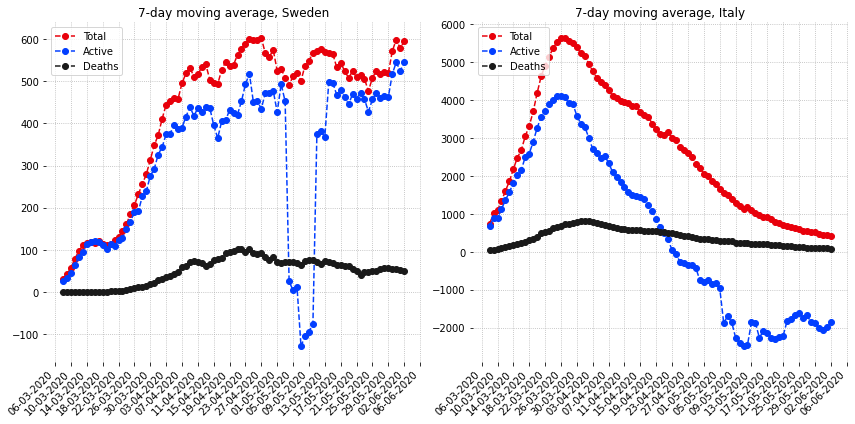

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

it_tot_avg = []
it_act_avg = []
it_d_avg = []

swe_tot_avg = []
swe_act_avg = []
swe_d_avg = []

for i in range(6, len(it_tot_day)):
  sum = 0
  for j in range(i - 6, (i + 1)):
      sum += it_tot_day[j]
  it_tot_avg.append(int(sum / 7))

for i in range(6, len(it_act_day)):
  sum = 0
  for j in range(i - 6, (i + 1)):
      sum += it_act_day[j]
  it_act_avg.append(int(sum / 7))

for i in range(6, len(it_d_day)):
  sum = 0
  for j in range(i - 6, (i + 1)):
      sum += it_d_day[j]
  it_d_avg.append(int(sum / 7))

for i in range(6, len(swe_tot_day)):
  sum = 0
  for j in range(i - 6, (i + 1)):
      sum += swe_tot_day[j]
  swe_tot_avg.append(int(sum / 7))

for i in range(6, len(swe_active_day)):
  sum = 0
  for j in range(i - 6, (i + 1)):
      sum += swe_active_day[j]
  swe_act_avg.append(int(sum / 7))

for i in range(6, len(swe_d_day)):
  sum = 0
  for j in range(i - 6, (i + 1)):
      sum += swe_d_day[j]
  swe_d_avg.append(int(sum / 7))

start = dt.date(2020, 3, 8)
end = start + dt.timedelta(days=len(it_act_avg))
days = mdates.drange(start, end, dt.timedelta(days=1))


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(days, swe_tot_avg, '--ro', label='Total')
ax1.plot(days, swe_act_avg, '--bo', label='Active')
ax1.plot(days, swe_d_avg, '--ko', label='Deaths')
ax1.legend(loc="upper left")
ax1.set_title('7-day moving average, Sweden')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(122)
ax2.plot(days, it_tot_avg, '--ro', label='Total')
ax2.plot(days, it_act_avg, '--bo', label='Active')
ax2.plot(days, it_d_avg, '--ko', label='Deaths')
ax2.legend(loc="upper left")
ax2.set_title('7-day moving average, Italy')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax2.axes.grid(linestyle='dotted')

sns.set_color_codes('bright')
sns.despine(left = True, bottom = True)
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
fig.set_figheight(6)
fig.set_figwidth(12)
plt.tight_layout()
plt.show()

We then compare the number of weekly total cases with the number of weekly total tests administered by both countries, from week 10 (starting March 2) to week 22 (ending May 31). On top of each bar we set the percentage of total cases per number of tests.

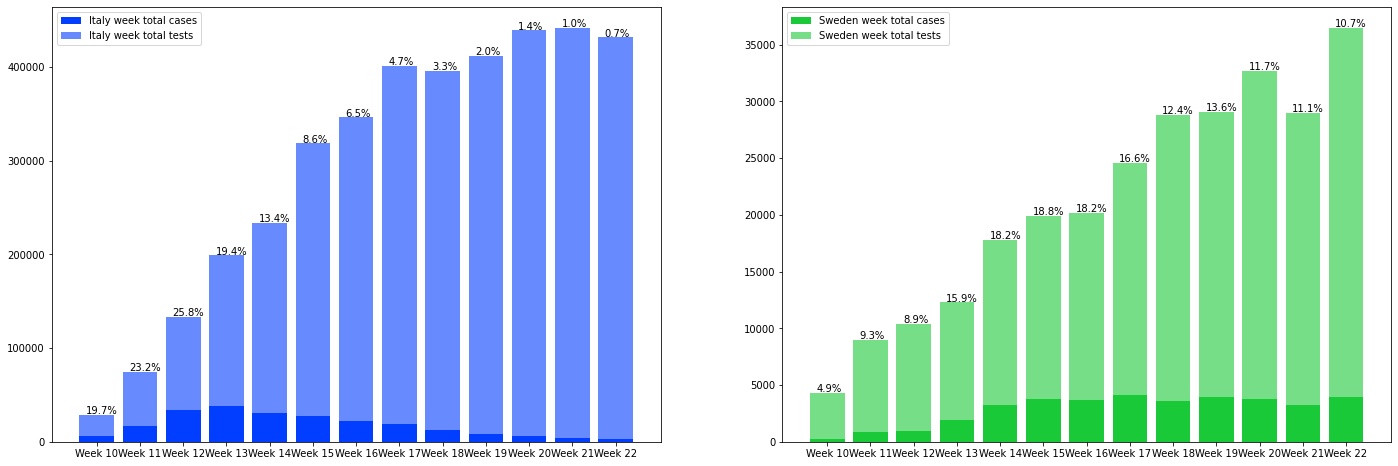

Week 22 tests per 100k population, Italy: 713.94
Week 22 tests per 100k population, Sweden: 361.66


In [8]:
import numpy as np
import matplotlib.pyplot as plt

swe_total_week = {'Week 10': 211, 'Week 11': 838, 'Week 12': 921,
                  'Week 13': 1959, 'Week 14': 3231, 'Week 15': 3740,
                  'Week 16': 3684, 'Week 17': 4093, 'Week 18': 3560,
                  'Week 19': 3969, 'Week 20': 3813, 'Week 21': 3206,
                  'Week 22': 3919}

swe_tests_week = {'Week 10': 4300, 'Week 11': 9000, 'Week 12': 10400,
                  'Week 13': 12300, 'Week 14': 17800, 'Week 15': 19900,
                  'Week 16': 20200, 'Week 17': 24600, 'Week 18': 28800,
                  'Week 19': 29100, 'Week 20': 32700, 'Week 21': 29000,
                  'Week 22': 36500}

it_total_week = {'Week 10': 5681, 'Week 11': 17372, 'Week 12': 34390,
                 'Week 13': 38552, 'Week 14': 31259, 'Week 15': 27415,
                 'Week 16': 22609, 'Week 17': 18703, 'Week 18': 13042,
                 'Week 19': 8353, 'Week 20': 6365, 'Week 21': 4423,
                 'Week 22': 3139}

it_tests_week = {'Week 10': 28810, 'Week 11': 74962, 'Week 12': 133503,
                'Week 13': 199128, 'Week 14': 233931, 'Week 15': 318732,
                'Week 16': 346348, 'Week 17': 401118, 'Week 18': 396113,
                'Week 19': 412140, 'Week 20': 439048, 'Week 21': 442052,
                'Week 22': 431727}

it_w_percent = []
for k, v in it_total_week.items():
  it_w_percent.append((v / it_tests_week[k]) * 100)

swe_w_percent = []
for k, v in swe_total_week.items():
  swe_w_percent.append((v / swe_tests_week[k]) * 100)


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.bar(it_total_week.keys(), it_total_week.values(), color='b', label='Italy week total cases')
ax1.bar(it_tests_week.keys(), it_tests_week.values(), color='b', label='Italy week total tests', alpha= 0.6)
for i, v in enumerate(it_w_percent):
    ax1.text(i - 0.25, list(it_tests_week.values())[i] + 1000, '{:.1f}%'.format(v),  color='black')
ax1.legend(loc="upper left")

ax2 = fig.add_subplot(122)
ax2.bar(swe_total_week.keys(), swe_total_week.values(), color='g', label='Sweden week total cases')
ax2.bar(swe_tests_week.keys(), swe_tests_week.values(), color='g', label='Sweden week total tests', alpha= 0.6)
for i, v in enumerate(swe_w_percent):
    ax2.text(i - 0.25, list(swe_tests_week.values())[i] + 70, '{:.1f}%'.format(v),  color='black')
ax2.legend(loc="upper left")

fig.set_figheight(8)
fig.set_figwidth(24)
plt.show()

print("Week 22 tests per 100k population, Italy: {0:.2f}".format((it_tests_week['Week 22'] / 60471198) * 100000))
print("Week 22 tests per 100k population, Sweden: {0:.2f}".format((swe_tests_week['Week 22'] / 10092371) * 100000))

We then compare the total cases and deaths by age and gender for both countries. The first row reports the absolute number of total cases and displays the percentage over total cases for that age/gender group. 
The second row reports the absolute number of deaths and displays the percentage over total deaths for that age/gender group. 
The third row reports the percentage of deaths over total cases for that age/gender group.

The unknown column refers to age. Data last updated on May 26 for Italy [1] and May 28 for Sweden [2].

[1] [Istituto Superiore di Sanità - Sorveglianza integrata COVID-19](https://www.epicentro.iss.it/coronavirus/sars-cov-2-sorveglianza-dati)

[2] [Folkhälsomyndigheten - Bekräftade fall i Sverige – daglig uppdatering](https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/bekraftade-fall-i-sverige/)

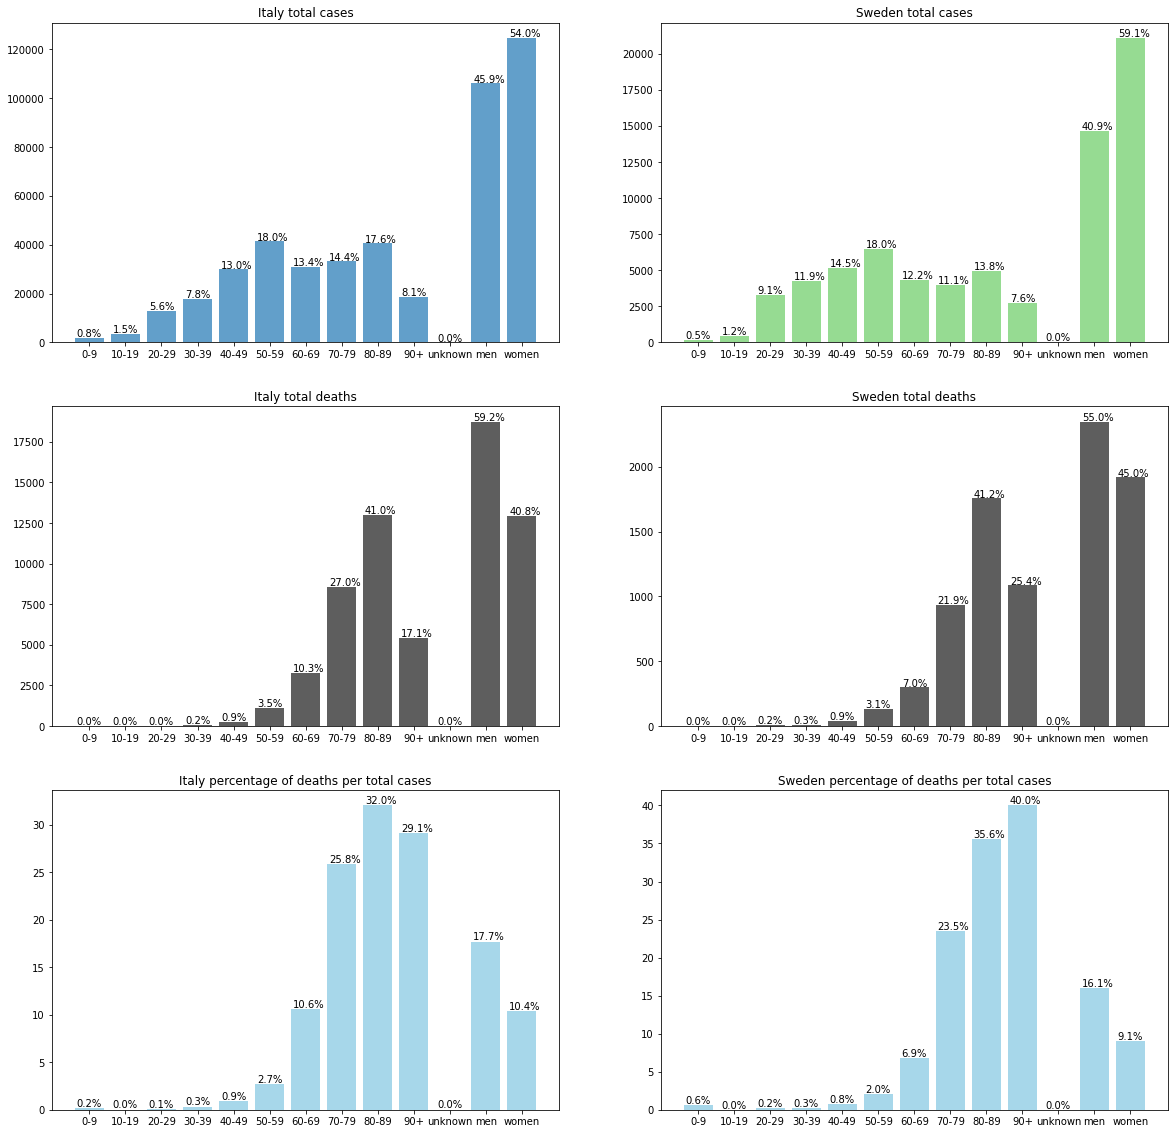

In [0]:
import numpy as np
import matplotlib.pyplot as plt

it_tot_age = {'0-9': 1919, '10-19': 3442, '20-29': 12933, '30-39': 17934,
              '40-49': 29942, '50-59': 41435, '60-69': 30880, '70-79': 33141,
              '80-89': 40532, '90+': 18602, 'unknown': 51, 'total': 230811}

it_d_age = {'0-9': 4, '10-19': 0, '20-29': 12, '30-39': 62,
            '40-49': 273, '50-59': 1109, '60-69': 3259, '70-79': 8562,
            '80-89': 12980, '90+': 5415, 'unknown': 0, 'total': 31676}

swe_tot_age = {'0-9': 172, '10-19': 424, '20-29': 3268, '30-39': 4264,
              '40-49': 5182, '50-59': 6446, '60-69': 4345, '70-79': 3972,
              '80-89': 4935, '90+': 2711, 'unknown': 8, 'total': 35727}

swe_d_age = {'0-9': 1, '10-19': 0, '20-29': 8, '30-39': 12,
             '40-49': 40, '50-59': 132, '60-69': 298, '70-79': 934,
             '80-89': 1756, '90+': 1085, 'unknown': 0, 'total': 4266}

it_tot_gender = {'men': 106035, 'women': 124743, 'total': 230811}

it_d_gender = {'men': 18744, 'women': 12932, 'total': 31676}

swe_tot_gender = {'men': 14622, 'women': 21101, 'total': 35727}

swe_d_gender = {'men': 2348, 'women': 1918, 'total': 4266}

it_t_age_percent = []
for k, v in it_tot_age.items():
  if k is not 'total':
    it_t_age_percent.append((v / it_tot_age['total']) * 100)

it_d_age_percent = []
for k, v in it_d_age.items():
  if k is not 'total':
    it_d_age_percent.append((v / it_d_age['total']) * 100)

swe_t_age_percent = []
for k, v in swe_tot_age.items():
  if k is not 'total':
    swe_t_age_percent.append((v / swe_tot_age['total']) * 100)

swe_d_age_percent = []
for k, v in swe_d_age.items():
  if k is not 'total':
    swe_d_age_percent.append((v / swe_d_age['total']) * 100)

it_t_gender_percent = []
for k, v in it_tot_gender.items():
  if k is not 'total':
    it_t_gender_percent.append((v / it_tot_gender['total']) * 100)

it_d_gender_percent = []
for k, v in it_d_gender.items():
  if k is not 'total':
    it_d_gender_percent.append((v / it_d_gender['total']) * 100)

swe_t_gender_percent = []
for k, v in swe_tot_gender.items():
  if k is not 'total':
    swe_t_gender_percent.append((v / swe_tot_gender['total']) * 100)

swe_d_gender_percent = []
for k, v in swe_d_gender.items():
  if k is not 'total':
    swe_d_gender_percent.append((v / swe_d_gender['total']) * 100)

it_dp_age_percent = []
for k, v in it_d_age.items():
  if k is not 'total':
    it_dp_age_percent.append((v / it_tot_age[k]) * 100)

it_dp_gender_percent = []
for k, v in it_d_gender.items():
  if k is not 'total':
    it_dp_gender_percent.append((v / it_tot_gender[k]) * 100)

swe_dp_age_percent = []
for k, v in swe_d_age.items():
  if k is not 'total':
    swe_dp_age_percent.append((v / swe_tot_age[k]) * 100)

swe_dp_gender_percent = []
for k, v in swe_d_gender.items():
  if k is not 'total':
    swe_dp_gender_percent.append((v / swe_tot_gender[k]) * 100)

for el in it_t_gender_percent:
  it_t_age_percent.append(el)

for el in it_d_gender_percent:
  it_d_age_percent.append(el)

for el in swe_t_gender_percent:
  swe_t_age_percent.append(el)

for el in swe_d_gender_percent:
  swe_d_age_percent.append(el)

for el in it_dp_gender_percent:
  it_dp_age_percent.append(el)

for el in swe_dp_gender_percent:
  swe_dp_age_percent.append(el)

it_tot_age.pop('total')
it_d_age.pop('total')
swe_tot_age.pop('total')
swe_d_age.pop('total')
it_tot_gender.pop('total')
it_d_gender.pop('total')
swe_tot_gender.pop('total')
swe_d_gender.pop('total')

it_tot_age['men'] = it_tot_gender['men']
it_tot_age['women'] = it_tot_gender['women']
it_d_age['men'] = it_d_gender['men']
it_d_age['women'] = it_d_gender['women']
swe_tot_age['men'] = swe_tot_gender['men']
swe_tot_age['women'] = swe_tot_gender['women']
swe_d_age['men'] = swe_d_gender['men']
swe_d_age['women'] = swe_d_gender['women']

fig = plt.figure()
ax1 = fig.add_subplot(321)
ax1.bar(it_tot_age.keys(), it_tot_age.values(), alpha=0.7,)
for i, v in enumerate(it_t_age_percent):
    ax1.text(i - 0.35,  list(it_tot_age.values())[i] + 500, '{:.1f}%'.format(v),  color='black')
ax1.set_title('Italy total cases')

ax2 = fig.add_subplot(322)
ax2.bar(swe_tot_age.keys(), swe_tot_age.values(), color='g', alpha=0.7,)
for i, v in enumerate(swe_t_age_percent):
    ax2.text(i - 0.35, list(swe_tot_age.values())[i] + 100, '{:.1f}%'.format(v),  color='black')
ax2.set_title('Sweden total cases')

ax3 = fig.add_subplot(323)
ax3.bar(it_d_age.keys(), it_d_age.values(), color='k', alpha=0.7)
for i, v in enumerate(it_d_age_percent):
    ax3.text(i - 0.35, list(it_d_age.values())[i] + 100, '{:.1f}%'.format(v),  color='black')
ax3.set_title('Italy total deaths')

ax4 = fig.add_subplot(324)
ax4.bar(swe_d_age.keys(), swe_d_age.values(), color='k', alpha=0.7)
for i, v in enumerate(swe_d_age_percent):
    ax4.text(i - 0.35, list(swe_d_age.values())[i] + 10, '{:.1f}%'.format(v),  color='black')
ax4.set_title('Sweden total deaths')


ax5 = fig.add_subplot(325)
ax5.bar(it_d_age.keys(), it_dp_age_percent, color='c', alpha=0.7)
for i, v in enumerate(it_dp_age_percent):
    ax5.text(i - 0.35, it_dp_age_percent[i] + 0.2, '{:.1f}%'.format(v),  color='black')
ax5.set_title('Italy percentage of deaths per total cases')


ax6 = fig.add_subplot(326)
ax6.bar(swe_d_age.keys(), swe_dp_age_percent, color='c', alpha=0.7)
for i, v in enumerate(swe_dp_age_percent):
    ax6.text(i - 0.35, swe_dp_age_percent[i] + 0.2, '{:.1f}%'.format(v),  color='black')
ax6.set_title('Sweden percentage of deaths per total cases')

fig.set_figheight(20)
fig.set_figwidth(20)
plt.show()

We then compare the swedish trend to the trend of active cases in Lombardy (10 million inhabitants), Emilia-Romagna (4.4 million inhabitants) and Veneto (4.9 million inhabitants), respectively the 1st, 3rd and 5th region by number of active cases. Piedmont is second, Lazio is fourth. 

The cases start from March 8, first day of Italy reporting active cases by region. This is in the attempt to distinguish italian trends from the trend of Lombardy, which was particularly severe. 

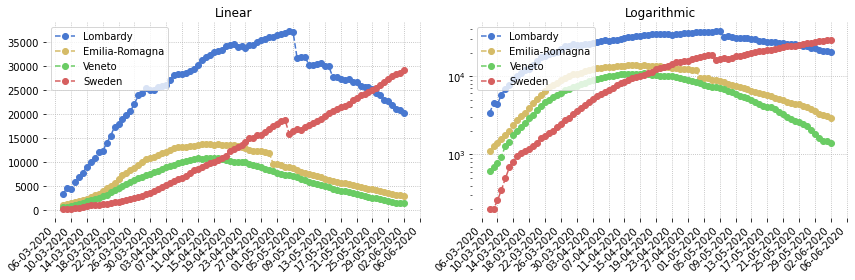

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

lom_act = [3372, 4490, 4427, 5763, 6896, 7732, 9059, 10043, 10861, 12095, 12266, 13938, 15420, 17370, 17885, 18910, 19868, 20591, 22189, 23895, 24509, 
           25392, 25006, 25124, 25765, 25876, 26189, 27220, 28124, 28469, 28343, 28545, 29074, 29530, 30258, 31265, 31935, 32363, 32921, 33090, 33434,
           34195, 34497, 34587, 33978, 34242, 33873, 34368, 34473, 35166, 35441, 35744, 36122, 36211, 36473, 36667, 36926, 37307, 37092, 31753, 32015,
           31983, 30262, 30190, 30411, 30675, 30032, 29956, 27746, 27679, 27430, 27073, 27291, 26671, 26715, 25933, 25630, 25614, 25215, 24477, 24037,
           22913, 22683, 21809, 20996, 20861, 20255]

er_act = [1097, 1286, 1417, 1588, 1758, 2011, 2349, 2741, 3088, 3404, 3915, 4506, 5089, 5661, 6390, 7220, 7711, 8256, 8850, 9361, 9964, 10535, 10766, 10953,
          11489, 11859, 12178, 12523, 12837, 13051, 13048, 13110, 13258, 13350, 13495, 13672, 13818, 13778, 13577, 13663, 13585, 13584, 13552, 13522, 13244, 
          13084, 12845, 12509, 12347, 12341, 12225, 12003, 11862, 9563, 9484, 9323, 9045, 8984, 8681, 8391, 8011, 7730, 7401, 7191, 7040, 6801, 6502, 6301, 
          6001, 5852, 5656, 5525, 5330, 5098, 4926, 4730, 4570, 4457, 4359, 4146, 3998, 3750, 3564, 3279, 3163, 3068, 2912]

ve_act = [623, 694, 783, 940, 1297, 1453, 1775, 1989, 2274, 2488, 2953, 3169, 3677, 4214, 4644, 4986, 5351, 5745, 6140, 6648, 6913, 7251, 7564, 7850, 8224, 
          8578, 8861, 9093, 9409, 9722, 9965, 10171, 10449, 10647, 10749, 10729, 10766, 10736, 10789, 10800, 10618, 10444, 10210, 10061, 10077, 9991, 9925,
          9679, 9432, 9138, 8860, 8601, 8369, 8147, 7779, 7431, 7299, 7234, 7116, 6789, 6534, 6187, 5877, 5591, 5460, 5190, 5020, 4718, 4439, 4162, 4041,
          4004, 3754, 3532, 3286, 3023, 2841, 2660, 2578, 2431, 2287, 2025, 1849, 1612, 1500, 1468, 1403]

sweden_active = [202, 202, 259, 354, 498, 685, 812, 958, 1036, 1113, 1187, 1276, 1412, 1607, 1734, 1897, 2003, 2243, 2448, 2747, 2948, 3326, 3574, 3928, 
                 4291, 4735, 5157, 5566, 5961, 6350, 6634, 7026, 7653, 8233, 8498, 9016, 9352, 9717, 10087, 10427, 10794, 11337, 12382, 12691, 13039, 
                 13603, 14247, 14969, 15027, 15548, 15740, 16349, 16904, 17591, 17963, 18483, 18713, 15918, 16383, 16985, 16686, 17234, 17819, 18175, 18544,
                 19054, 19561, 20172, 20712, 21095, 21533, 21784, 22171, 22853, 23390, 24026, 24296, 24534, 24988, 25487, 26081, 26644, 27260, 27915, 28350,
                 28668, 29302]

start = dt.date(2020, 3, 8)
end = start + dt.timedelta(days=len(lom_act))
days = mdates.drange(start, end, dt.timedelta(days=1))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(days, lom_act, '--bo', label='Lombardy')
ax1.plot(days, er_act, '--yo', label='Emilia-Romagna')
ax1.plot(days, ve_act, '--go', label='Veneto')
ax1.plot(days, sweden_active, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(122)
ax2.plot(days, lom_act, '--bo', label='Lombardy')
ax2.plot(days, er_act, '--yo', label='Emilia-Romagna')
ax2.plot(days, ve_act, '--go', label='Veneto')
ax2.plot(days, sweden_active, '--ro', label='Sweden')
ax2.legend(loc="upper left")
ax2.set_title('Logarithmic')
ax2.set_yscale('log')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax2.axes.grid(linestyle='dotted')

sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
fig.set_figheight(4)
fig.set_figwidth(12)
plt.tight_layout()
plt.show()

We then plot a pie chart by absolute number of total cases by region (Italy) and by county (Sweden). We then do the same by cases/10000 population, instead of absolute numbers. 

We also compare in a bar chart the percentage of cases by population for the italian regions and the 20 most affected swedish counties (all counties except Kalmar).

The data are for April 1, April 10, April 22 and April 30.

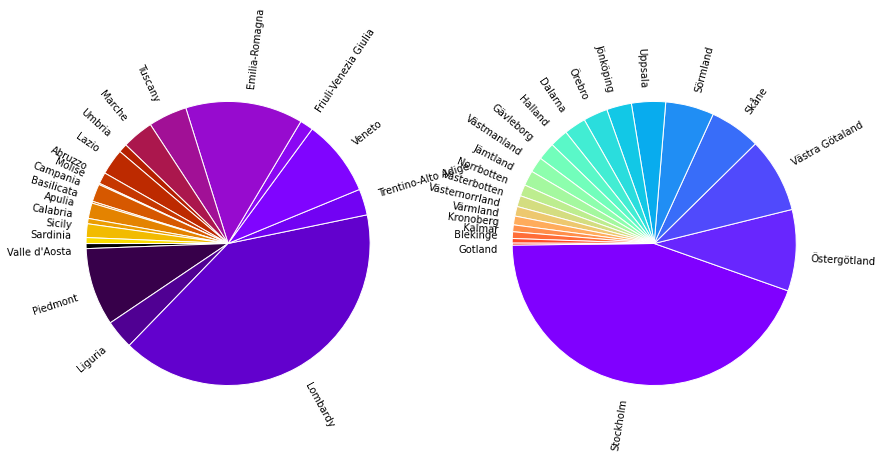

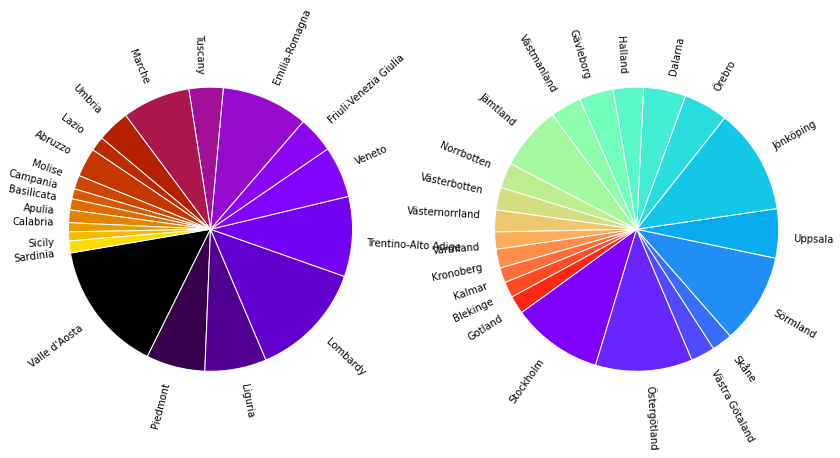

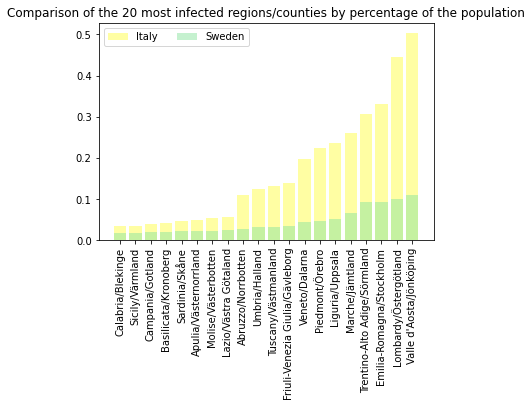

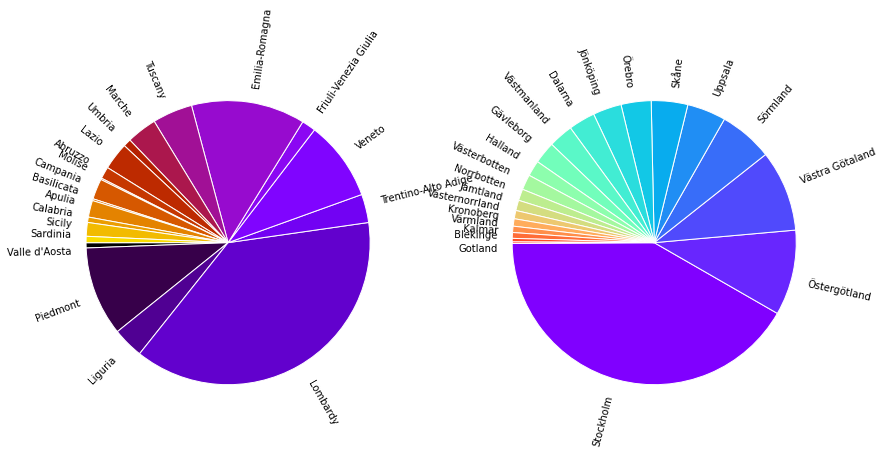

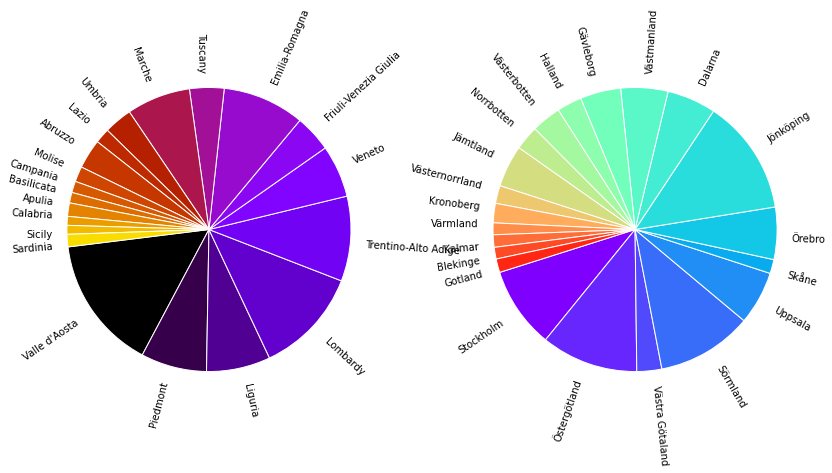

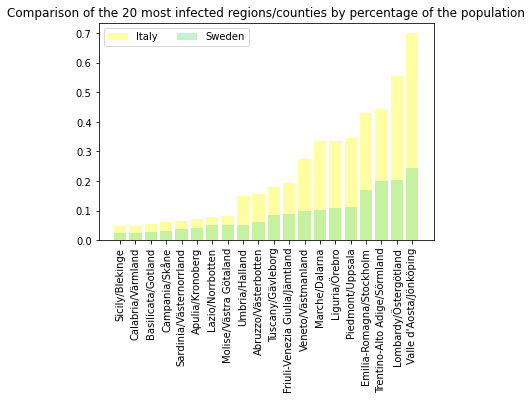

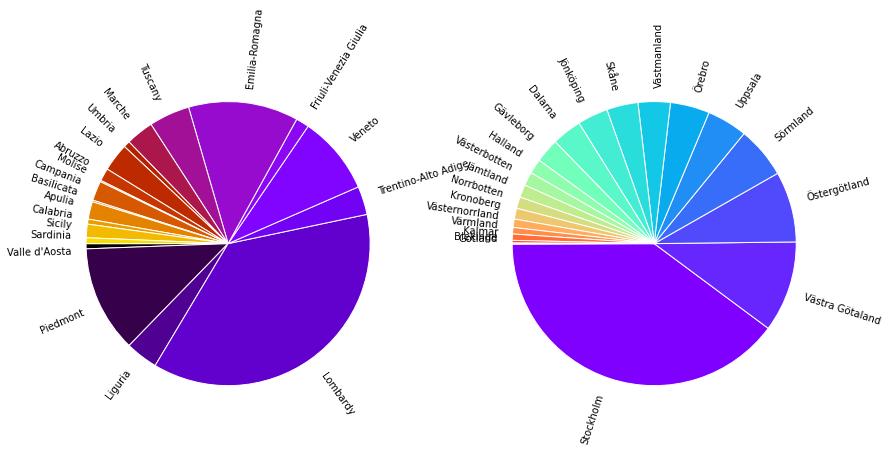

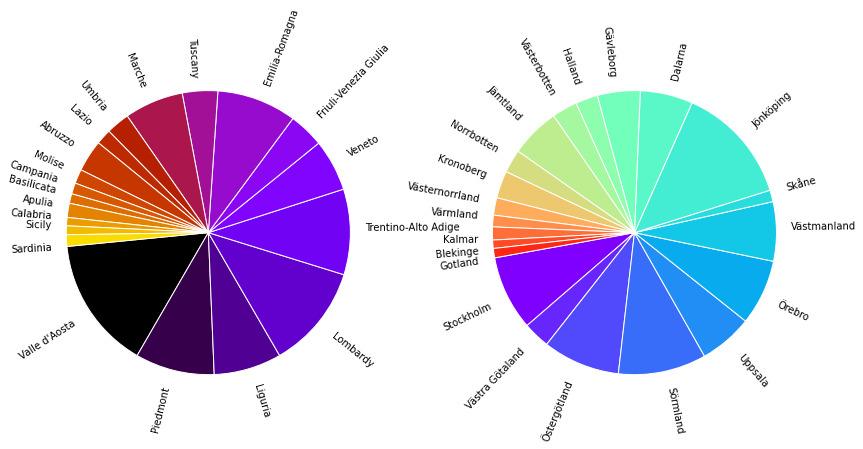

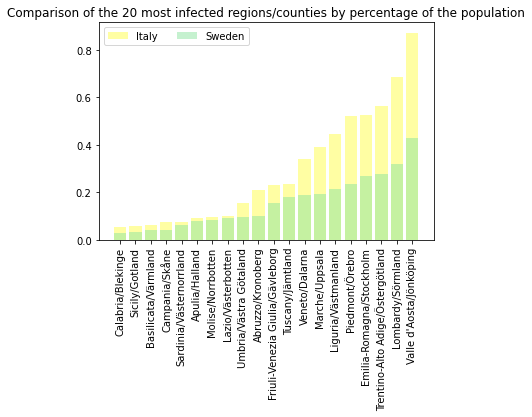

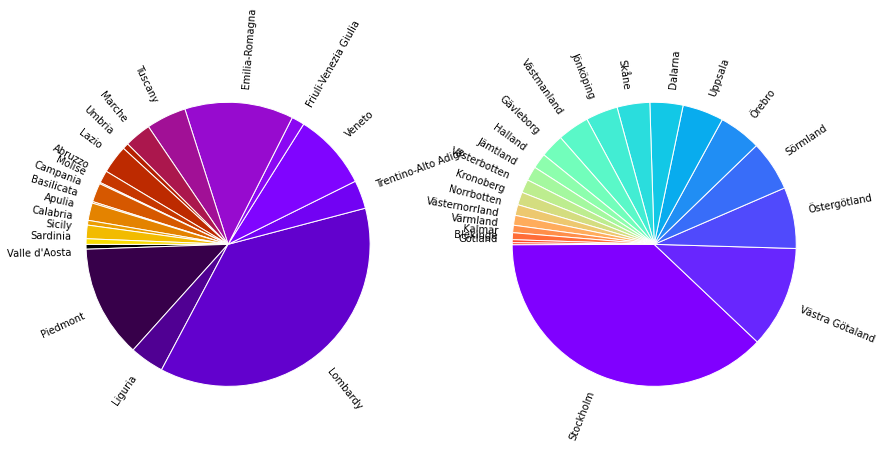

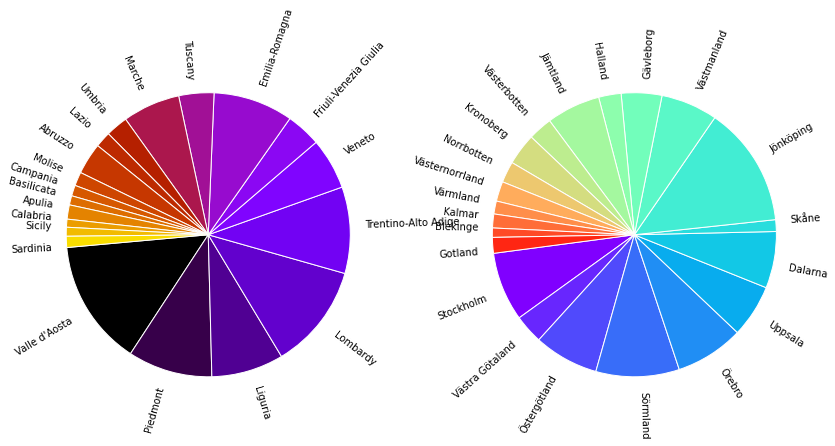

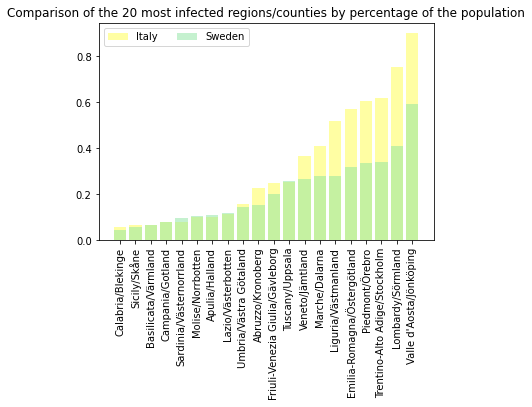

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle

italy_reg_1 = {'Valle d\'Aosta': 631, 'Piedmont': 9795, 'Liguria': 3660,
             'Lombardy': 44773, 'Trentino-Alto Adige': 3288, 'Veneto': 9625,
             'Friuli-Venezia Giulia': 1685, 'Emilia-Romagna': 14787, 'Tuscany': 4867,
             'Marche': 3962, 'Umbria': 1095, 'Lazio': 3264, 'Abruzzo': 1436,
             'Molise': 160, 'Campania': 2231, 'Basilicata': 237, 
             'Apulia': 1946, 'Calabria': 669, 'Sicily': 1718, 'Sardinia': 745}
             
italy_reg_10 = {'Valle d\'Aosta': 879, 'Piedmont': 15012, 'Liguria': 5191,
             'Lombardy': 56048, 'Trentino-Alto Adige': 4771, 'Veneto': 13421,
             'Friuli-Venezia Giulia': 2349, 'Emilia-Romagna': 19128, 'Tuscany': 6727,
             'Marche': 5084, 'Umbria': 1302, 'Lazio': 4583, 'Abruzzo': 2014,
             'Molise': 243, 'Campania': 3442, 'Basilicata': 308, 
             'Apulia': 2809, 'Calabria': 901, 'Sicily': 2302, 'Sardinia': 1063}

italy_reg_22 = {'Valle d\'Aosta': 1095, 'Piedmont': 22739, 'Liguria': 6918,
             'Lombardy': 69092, 'Trentino-Alto Adige': 6062, 'Veneto': 16738,
             'Friuli-Venezia Giulia': 2817, 'Emilia-Romagna': 23434, 'Tuscany': 8700,
             'Marche': 5924, 'Umbria': 1357, 'Lazio': 5975, 'Abruzzo': 2733,
             'Molise': 284, 'Campania': 4185, 'Basilicata': 354, 
             'Apulia': 3730, 'Calabria': 1060, 'Sicily': 2883, 'Sardinia': 1247}

italy_reg_30 = {'Valle d\'Aosta': 1128, 'Piedmont': 26289, 'Liguria': 7993,
             'Lombardy': 75732, 'Trentino-Alto Adige': 6634, 'Veneto': 17960,
             'Friuli-Venezia Giulia': 3025, 'Emilia-Romagna': 25436, 'Tuscany': 9352,
             'Marche': 6247, 'Umbria': 1392, 'Lazio': 6616, 'Abruzzo': 2930,
             'Molise': 298, 'Campania': 4423, 'Basilicata': 367, 
             'Apulia': 4072, 'Calabria': 1108, 'Sicily': 3166, 'Sardinia': 1295}

italy_pop = {'Valle d\'Aosta': 125332, 'Piedmont': 4356406, 'Liguria': 1550640,
             'Lombardy': 10078012, 'Trentino-Alto Adige': 1074524, 'Veneto': 4905854,
             'Friuli-Venezia Giulia': 1215220, 'Emilia-Romagna': 4459477, 'Tuscany': 3729641,
             'Marche': 1522608, 'Umbria': 879337, 'Lazio': 5867097, 'Abruzzo': 1304970,
             'Molise': 302931, 'Campania': 5772625, 'Basilicata': 559084, 
             'Apulia': 4012310, 'Calabria': 1935414, 'Sicily': 4969147, 'Sardinia': 1632892}

swe_reg_1 = {'Stockholm': 2224, 'Östergötland': 464, 'Västra Götaland': 427,
           'Skåne': 291, 'Sörmland': 276, 'Uppsala': 194, 'Jönköping': 142,
           'Örebro': 139, 'Dalarna': 125, 'Halland': 104, 'Gävleborg': 101,
           'Västmanland': 88, 'Jämtland': 86, 'Norrbotten': 65,
           'Västerbotten': 63, 'Västernorrland': 55, 'Värmland': 50,
           'Kronoberg': 39, 'Kalmar': 38, 'Blekinge': 26, 'Gotland': 11}

swe_reg_10 = {'Stockholm': 4061, 'Östergötland': 948, 'Västra Götaland': 902,
            'Sörmland': 597, 'Uppsala': 431, 'Skåne': 405, 'Örebro': 334, 
            'Jönköping': 317, 'Dalarna': 296, 'Västmanland': 273, 'Gävleborg': 245,
            'Halland': 175, 'Västerbotten': 169, 'Norrbotten': 128, 'Jämtland': 115, 
            'Västernorrland': 92, 'Kronoberg': 82, 'Värmland': 70,
            'Kalmar': 64, 'Blekinge': 39, 'Gotland': 17}

swe_reg_22 = {'Stockholm': 6401, 'Västra Götaland': 1667, 'Östergötland': 1295, 
            'Sörmland': 944, 'Uppsala': 739, 'Örebro': 720, 'Västmanland': 589, 
            'Skåne': 575, 'Jönköping': 560, 'Dalarna': 546, 'Gävleborg': 443,
            'Halland': 268, 'Västerbotten': 249, 'Jämtland': 234, 'Norrbotten': 210,  
             'Kronoberg': 198, 'Västernorrland': 154, 'Värmland': 118,
            'Kalmar': 115, 'Blekinge': 48, 'Gotland': 20}

swe_reg_30 = {'Stockholm': 8033, 'Västra Götaland': 2459, 'Östergötland': 1476,
            'Sörmland': 1215, 'Örebro': 1022, 'Uppsala': 992, 'Dalarna': 798,
            'Skåne': 789, 'Jönköping': 772, 'Västmanland': 766, 'Gävleborg': 571,
            'Halland': 367, 'Jämtland': 345, 'Västerbotten': 322, 'Kronoberg': 311,
            'Norrbotten': 259, 'Västernorrland': 238, 'Värmland': 179,
            'Kalmar': 167, 'Blekinge': 73, 'Gotland': 46}

swe_pop = {'Stockholm': 2377081, 'Östergötland': 465495, 'Västra Götaland': 1725881,
           'Skåne': 1375278, 'Sörmland': 297540, 'Uppsala': 383713, 'Jönköping': 130810,
           'Örebro': 304805, 'Dalarna': 287966, 'Halland': 333848, 'Gävleborg': 287382,
           'Västmanland': 275845, 'Jämtland': 130810, 'Norrbotten': 250093,
           'Västerbotten': 271736, 'Västernorrland': 245347, 'Värmland': 282414,
           'Kronoberg': 201469, 'Kalmar': 245446, 'Blekinge': 159606, 'Gotland': 59686}

italy_percent_1 = {}
swe_percent_1 = {}
italy_percent_10 = {}
swe_percent_10 = {}
italy_percent_22 = {}
swe_percent_22 = {}
italy_percent_30 = {}
swe_percent_30 = {}

for key, value in italy_reg_1.items():
  italy_percent_1[key] = (value / italy_pop[key]) * 10000

for key, value in swe_reg_1.items():
  swe_percent_1[key] = (value / swe_pop[key]) * 10000

for key, value in italy_reg_10.items():
  italy_percent_10[key] = (value / italy_pop[key]) * 10000

for key, value in swe_reg_10.items():
  swe_percent_10[key] = (value / swe_pop[key]) * 10000

for key, value in italy_reg_22.items():
  italy_percent_22[key] = (value / italy_pop[key]) * 10000

for key, value in swe_reg_22.items():
  swe_percent_22[key] = (value / swe_pop[key]) * 10000

for key, value in italy_reg_30.items():
  italy_percent_30[key] = (value / italy_pop[key]) * 10000

for key, value in swe_reg_30.items():
  swe_percent_30[key] = (value / swe_pop[key]) * 10000


def plot(cmp1, data1, cmp2, data2):
  # From: https://gist.github.com/vals/5257113
  cmap = cmp1
  slices = [1,2,3] * 4 + [20, 25, 30] * 2
  shuffle(slices)
  slices = sorted(slices)
  small = slices[int(len(slices) / 2):]
  large = slices[:int(len(slices) / 2)]
  colors = cmap(np.arange(len(data1))/ len(data1))

  fig = plt.figure(figsize=[10, 10])
  ax1 = fig.add_subplot(121)
  angle = 180 + float(sum(large[::2])) / sum(data1.values()) * 360
  pie_wedge_collection = ax1.pie(data1.values(), colors=colors, labels=data1.keys(), 
                                 labeldistance=1.1, rotatelabels=True, startangle=angle)
  for pie_wedge in pie_wedge_collection[0]:
      pie_wedge.set_edgecolor('white')

  cmap = cmp2
  colors = cmap(np.arange(len(data2))/ len(data2))
  ax2 = fig.add_subplot(122)
  angle = 180 + float(sum(large[::2])) / sum(data2.values()) * 360
  pie_wedge_collection = ax2.pie(data2.values(), colors=colors, labels=data2.keys(), 
                                 labeldistance=1.1, rotatelabels=True, startangle=angle)

  for pie_wedge in pie_wedge_collection[0]:
      pie_wedge.set_edgecolor('white')

  fig.set_figwidth(14)
  plt.show()


def fill_plots(italy_reg, italy_percent, swe_reg, swe_percent):
  plot(plt.cm.gnuplot, italy_reg, plt.cm.rainbow, swe_reg)
  plot(plt.cm.gnuplot, italy_percent, plt.cm.rainbow, swe_percent)

  italy_percent = {k: (v / 100) for k, v in sorted(italy_percent.items(), key=lambda item: item[1])}
  swe_percent = {k: (v / 100) for k, v in sorted(swe_percent.items(), key=lambda item: item[1])}
  swe_percent.pop('Kalmar', None)

  x_s = [k for k in italy_percent.keys()]
  for idx, val in enumerate(swe_percent.keys()):
    x_s[idx] += ("/" + val)

  sns.set_color_codes('pastel')
  plt.bar(x_s, italy_percent.values(), color='y', label='Italy')
  plt.bar(x_s, swe_percent.values(), color='g', alpha=0.5, label='Sweden')
  plt.xticks(x_s, rotation='vertical')
  plt.legend(ncol = 2, loc = 'upper left')
  plt.title('Comparison of the 20 most infected regions/counties by percentage of the ' 
            + 'population')
  plt.show()

fill_plots(italy_reg_1, italy_percent_1, swe_reg_1, swe_percent_1)
fill_plots(italy_reg_10, italy_percent_10, swe_reg_10, swe_percent_10)
fill_plots(italy_reg_22, italy_percent_22, swe_reg_22, swe_percent_22)
fill_plots(italy_reg_30, italy_percent_30, swe_reg_30, swe_percent_30)

At last, we look at the Google Trends for a few queries that have recently gained popularity in the two countries. 

Data last updated on April 28.

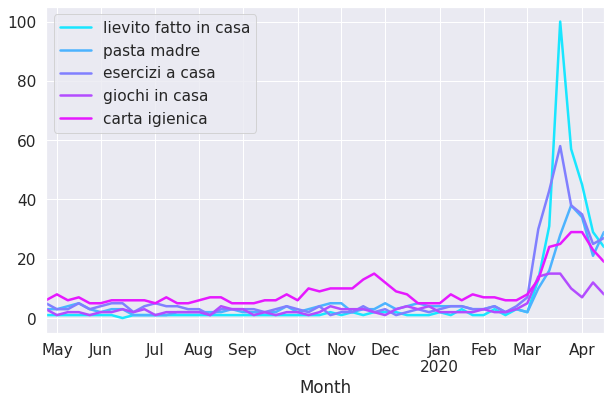

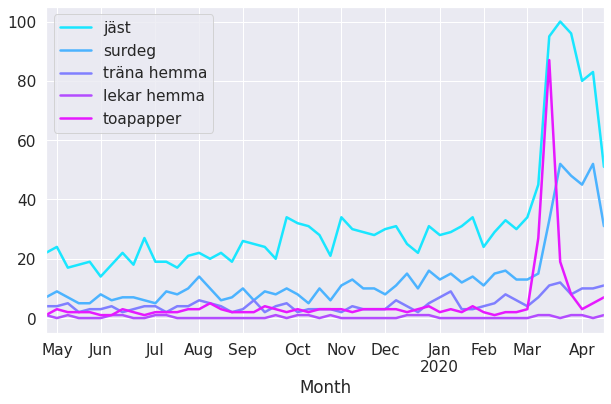

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

data_it = pd.read_csv('timeline_ita.csv', header=1)
data_swe = pd.read_csv('timeline_swe.csv', header=1)

data_it = data_it.rename(columns=lambda x: x.replace(': (Italy)', ''))
data_swe = data_swe.rename(columns=lambda x: x.replace(': (Sweden)', ''))
data_it['Week'] = [dt.datetime.strptime(x, '%Y-%m-%d') for x in data_it['Week']]
data_swe['Week'] = [dt.datetime.strptime(x, '%Y-%m-%d') for x in data_swe['Week']]

data_it['lievito fatto in casa'] = data_it['lievito fatto in casa'].apply(lambda x: 
                                                                    int(x.replace('<', '')))


colors = plt.cm.cool(np.linspace(0.1,0.9,5))
sns.set(font_scale=1.4)
data_it.set_index('Week', inplace=True)
ax1 = data_it.plot(figsize=(10, 6), linewidth=2.5, color=colors)
ax1.set_xlabel('Month')

data_swe.set_index('Week', inplace=True)
ax2 = data_swe.plot(figsize=(10, 6), linewidth=2.5, color=colors)
ax2.set_xlabel('Month')
plt.show()


